In [1]:
#pip install ucimlrepo

### Import Data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
cdc_diabetes_health_indicators = fetch_ucirepo(id=891) 
  
# data (as pandas dataframes) 
X = cdc_diabetes_health_indicators.data.features 
y = cdc_diabetes_health_indicators.data.targets 
  
# metadata 
print(cdc_diabetes_health_indicators.metadata) 
  
# variable information 
print(cdc_diabetes_health_indicators.variables) 

{'uci_id': 891, 'name': 'CDC Diabetes Health Indicators', 'repository_url': 'https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators', 'data_url': 'https://archive.ics.uci.edu/static/public/891/data.csv', 'abstract': 'The Diabetes Health Indicators Dataset contains healthcare statistics and lifestyle survey information about people in general along with their diagnosis of diabetes. The 35 features consist of some demographics, lab test results, and answers to survey questions for each patient. The target variable for classification is whether a patient has diabetes, is pre-diabetic, or healthy. ', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Tabular', 'Multivariate'], 'num_instances': 253680, 'num_features': 21, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Sex', 'Age', 'Education Level', 'Income'], 'target_col': ['Diabetes_binary'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_

In [4]:
X

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1,1,1,40,1,0,0,0,0,1,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,25,1,0,0,1,0,0,...,0,1,3,0,0,0,0,7,6,1
2,1,1,1,28,0,0,0,0,1,0,...,1,1,5,30,30,1,0,9,4,8
3,1,0,1,27,0,0,0,1,1,1,...,1,0,2,0,0,0,0,11,3,6
4,1,1,1,24,0,0,0,1,1,1,...,1,0,2,3,0,0,0,11,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,1,1,1,45,0,0,0,0,1,1,...,1,0,3,0,5,0,1,5,6,7
253676,1,1,1,18,0,0,0,0,0,0,...,1,0,4,0,0,1,0,11,2,4
253677,0,0,1,28,0,0,0,1,1,0,...,1,0,1,0,0,0,0,2,5,2
253678,1,0,1,23,0,0,0,0,1,1,...,1,0,3,0,0,0,1,7,5,1


The data contains mainly 0 and 1, with 0 meaning no and 1 meaning yes. 

#### GenHlth:

Would you say that in general your health is: scale 1-5 

1 = excellent 

2 = very good 

3 = good 

4 = fair 

5 = poor

#### PhysHlth:

Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? scale 1-30 days

#### MentHlth :

Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good? scale 1-30 days

#### Age:

13-level age category (_AGEG5YR see codebook) 

1 = 18-24 

9 = 60-64 

13 = 80 or older

#### Education:

Education level (EDUCA see codebook) scale 1-6 

1 = Never attended school or only kindergarten 

2 = Grades 1 through 8 (Elementary) 

3 = Grades 9 through 11 (Some high school) 

4 = Grade 12 or GED (High school graduate) 

5 = College 1 year to 3 years (Some college or technical school) 

6 = College 4 years or more (College graduate)


#### Income:

Income scale (INCOME2 see codebook) scale 1-8 

1 = less than $10,000 

5 = less than $35,000 

8 = $75,000 or more

In [5]:
X.columns

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

### Check for Nulls

In [6]:
X.isnull().sum()

HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [7]:
y.isnull().sum()

Diabetes_binary    0
dtype: int64

In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   HighBP                253680 non-null  int64
 1   HighChol              253680 non-null  int64
 2   CholCheck             253680 non-null  int64
 3   BMI                   253680 non-null  int64
 4   Smoker                253680 non-null  int64
 5   Stroke                253680 non-null  int64
 6   HeartDiseaseorAttack  253680 non-null  int64
 7   PhysActivity          253680 non-null  int64
 8   Fruits                253680 non-null  int64
 9   Veggies               253680 non-null  int64
 10  HvyAlcoholConsump     253680 non-null  int64
 11  AnyHealthcare         253680 non-null  int64
 12  NoDocbcCost           253680 non-null  int64
 13  GenHlth               253680 non-null  int64
 14  MentHlth              253680 non-null  int64
 15  PhysHlth              253680 non-n

### Descriptive Statistics

In [13]:
X[['PhysHlth', 'BMI', 'MentHlth', 'Income']].describe()

,PhysHlth,BMI,MentHlth,Income
count,253680.000000,253680.000000,253680.000000,253680.000000
mean,4.242081,28.382364,3.184772,6.053875
std,8.717951,6.608694,7.412847,2.071148
min,0.000000,12.000000,0.000000,1.000000
25%,0.000000,24.000000,0.000000,5.000000
50%,0.000000,27.000000,0.000000,7.000000
75%,3.000000,31.000000,2.000000,8.000000
max,30.000000,98.000000,30.000000,8.000000


[Text(0.5, 1.0, 'MentHlth')]

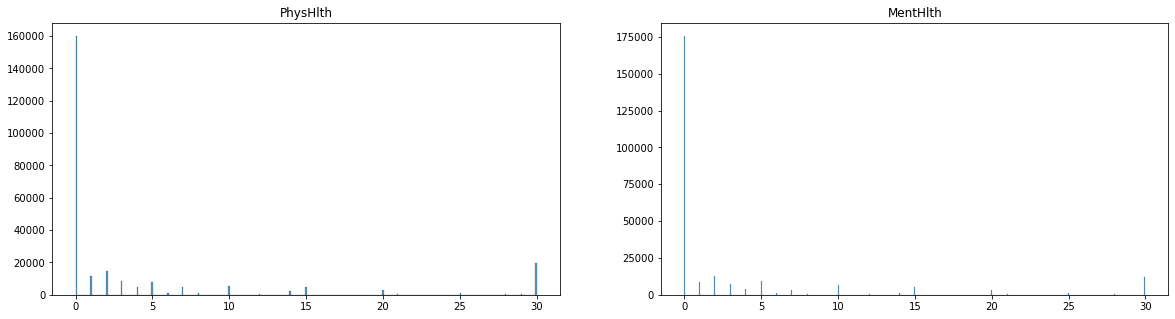

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

sns.histplot(data=X['PhysHlth'], ax=axes[0])
axes[0].set(xlabel='', ylabel= '')
axes[0].set(title = "PhysHlth")
sns.histplot(data=X['MentHlth'], ax=axes[1])
axes[1].set(xlabel='', ylabel= '')
axes[1].set(title = "MentHlth")

[Text(0.5, 1.0, 'Income')]

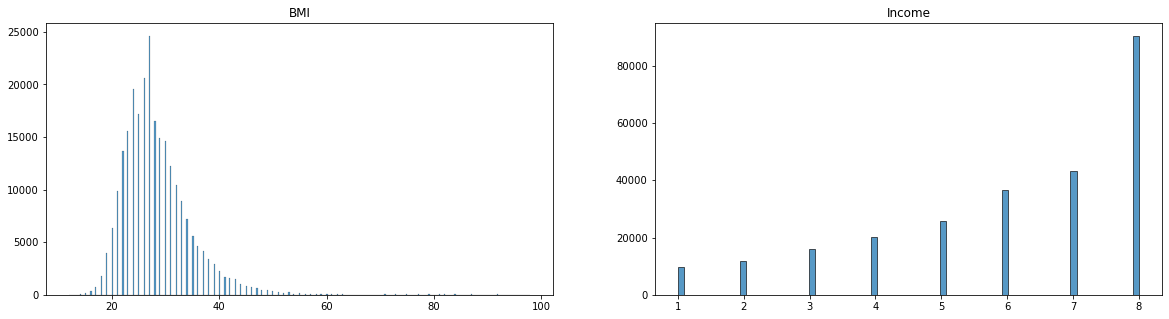

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
sns.histplot(data=X['BMI'], ax=axes[0])
axes[0].set(xlabel='', ylabel= '')
axes[0].set(title = "BMI")
sns.histplot(data=X['Income'], ax=axes[1])
axes[1].set(xlabel='', ylabel= '')
axes[1].set(title = "Income")

In [15]:
X.iloc[:,:7].describe()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186
std,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087
min,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000


In [16]:
X.iloc[:,7:14].describe()

,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.756544,0.634256,0.811420,0.056197,0.951053,0.084177,2.511392
std,0.429169,0.481639,0.391175,0.230302,0.215759,0.277654,1.068477
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000
50%,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000
75%,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000


In [17]:
X.iloc[:,14:].describe()

,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [20]:
y.describe()

,Diabetes_binary
count,253680.000000
mean,0.139333
std,0.346294
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


### Histogram Views

[Text(0.5, 1.0, 'CholCheck')]

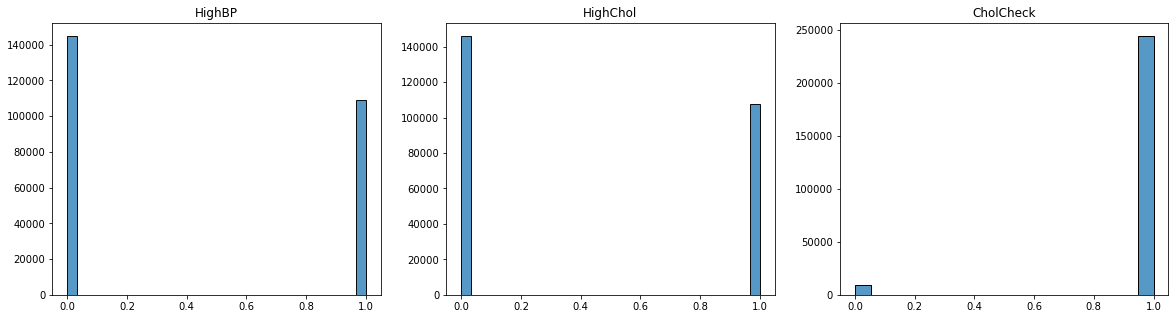

In [23]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

sns.histplot(data=X.iloc[:,0], ax=axes[0])
axes[0].set(xlabel='', ylabel= '')
axes[0].set(title = "HighBP")
sns.histplot(data=X.iloc[:,1], ax=axes[1])
axes[1].set(xlabel='', ylabel= '')
axes[1].set(title = "HighChol")
sns.histplot(data=X.iloc[:,2], ax=axes[2])
axes[2].set(xlabel='', ylabel= '')
axes[2].set(title = "CholCheck")

[Text(0.5, 1.0, 'Stroke')]

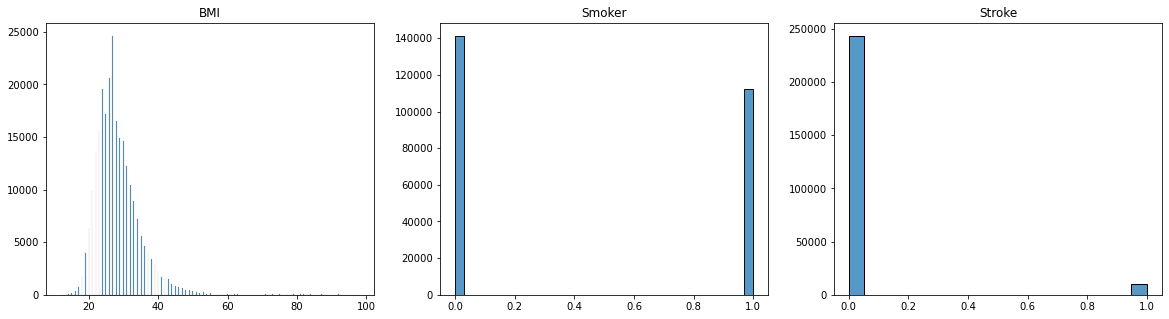

In [24]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

sns.histplot(data=X.iloc[:,3], ax=axes[0])
axes[0].set(xlabel='', ylabel= '')
axes[0].set(title = "BMI")
sns.histplot(data=X.iloc[:,4], ax=axes[1])
axes[1].set(xlabel='', ylabel= '')
axes[1].set(title = "Smoker")
sns.histplot(data=X.iloc[:,5], ax=axes[2])
axes[2].set(xlabel='', ylabel= '')
axes[2].set(title = "Stroke")

[Text(0.5, 1.0, 'Fruits')]

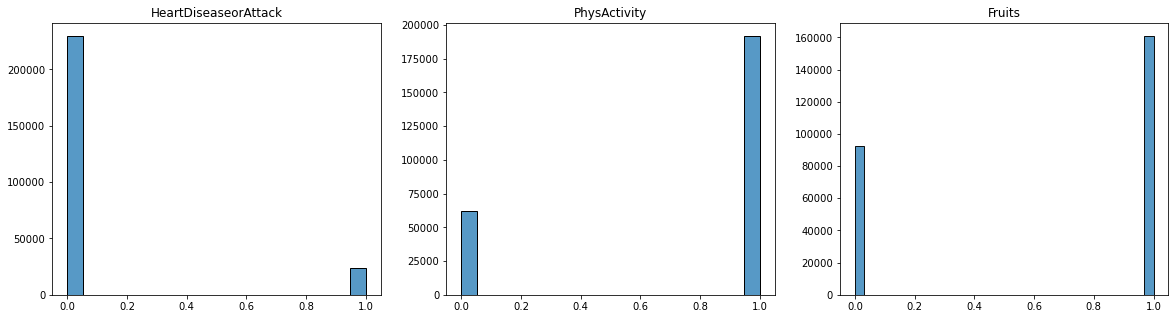

In [25]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

sns.histplot(data=X.iloc[:,6], ax=axes[0])
axes[0].set(xlabel='', ylabel= '')
axes[0].set(title = "HeartDiseaseorAttack")
sns.histplot(data=X.iloc[:,7], ax=axes[1])
axes[1].set(xlabel='', ylabel= '')
axes[1].set(title = "PhysActivity")
sns.histplot(data=X.iloc[:,8], ax=axes[2])
axes[2].set(xlabel='', ylabel= '')
axes[2].set(title = "Fruits")

[Text(0.5, 1.0, 'AnyHealthcare')]

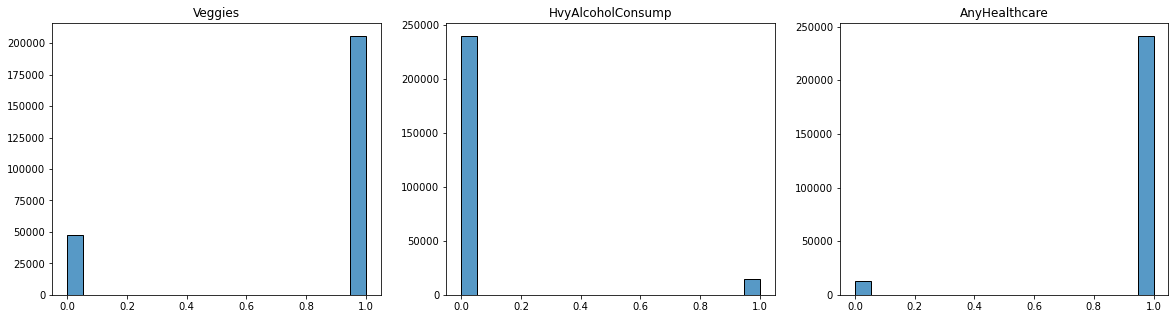

In [26]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

sns.histplot(data=X.iloc[:,9], ax=axes[0])
axes[0].set(xlabel='', ylabel= '')
axes[0].set(title = "Veggies")
sns.histplot(data=X.iloc[:,10], ax=axes[1])
axes[1].set(xlabel='', ylabel= '')
axes[1].set(title = "HvyAlcoholConsump")
sns.histplot(data=X.iloc[:,11], ax=axes[2])
axes[2].set(xlabel='', ylabel= '')
axes[2].set(title = "AnyHealthcare")

[Text(0.5, 1.0, 'MentHlth')]

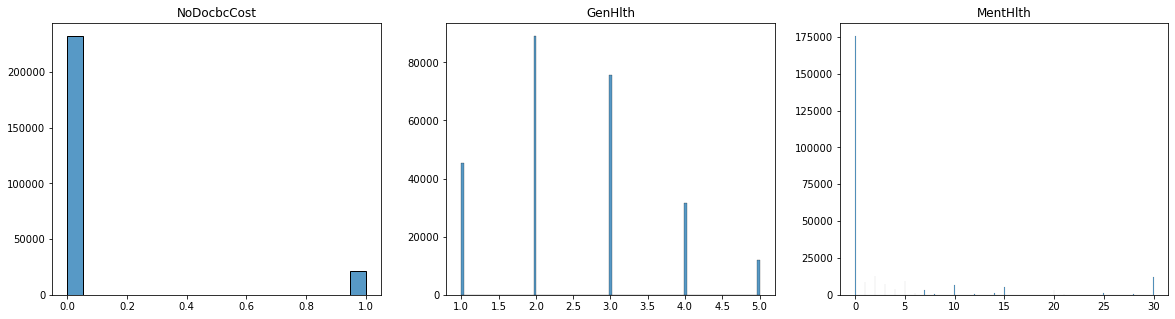

In [27]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

sns.histplot(data=X.iloc[:,12], ax=axes[0])
axes[0].set(xlabel='', ylabel= '')
axes[0].set(title = "NoDocbcCost")
sns.histplot(data=X.iloc[:,13], ax=axes[1])
axes[1].set(xlabel='', ylabel= '')
axes[1].set(title = "GenHlth")
sns.histplot(data=X.iloc[:,14], ax=axes[2])
axes[2].set(xlabel='', ylabel= '')
axes[2].set(title = "MentHlth")

[Text(0.5, 1.0, 'Sex')]

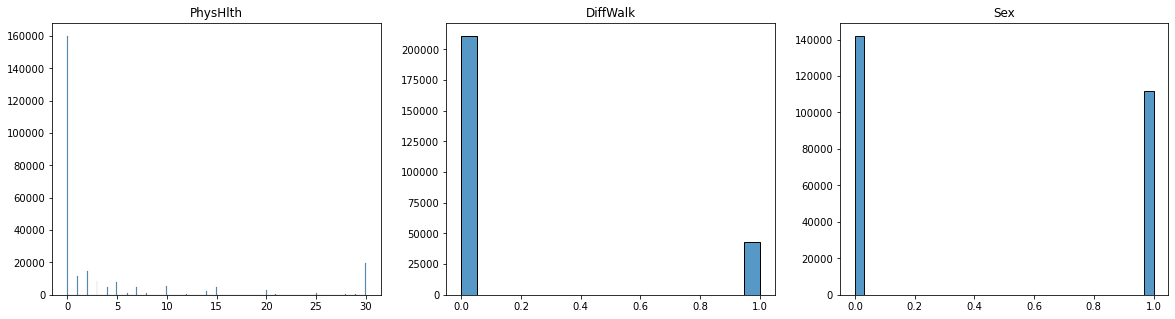

In [28]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

sns.histplot(data=X.iloc[:,15], ax=axes[0])
axes[0].set(xlabel='', ylabel= '')
axes[0].set(title = "PhysHlth")
sns.histplot(data=X.iloc[:,16], ax=axes[1])
axes[1].set(xlabel='', ylabel= '')
axes[1].set(title = "DiffWalk")
sns.histplot(data=X.iloc[:,17], ax=axes[2])
axes[2].set(xlabel='', ylabel= '')
axes[2].set(title = "Sex")

[Text(0.5, 1.0, 'Income')]

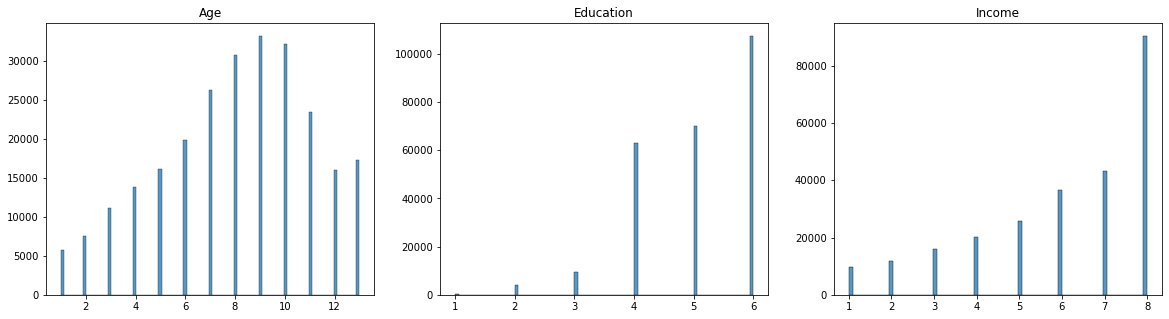

In [29]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

sns.histplot(data=X.iloc[:,18], ax=axes[0])
axes[0].set(xlabel='', ylabel= '')
axes[0].set(title = "Age")
sns.histplot(data=X.iloc[:,19], ax=axes[1])
axes[1].set(xlabel='', ylabel= '')
axes[1].set(title = "Education")
sns.histplot(data=X.iloc[:,20], ax=axes[2])
axes[2].set(xlabel='', ylabel= '')
axes[2].set(title = "Income")